## Reconocimiento de digitos
<p>Hasta ahora, solo hemos realizado una clasificación binaria, ya que la variable objetivo tenía dos resultados posibles. En los siguientes ejercicios, trabajarás con el conjunto de datos de reconocimiento de dígitos MNIST, que tiene 10 clases, ¡los dígitos del 0 al 9! Una versión reducida del conjunto de datos <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> es uno de los conjuntos de datos incluidos en <code>scikit-learn</code>

Cada muestra de este conjunto de datos es una imagen de 28x28 que representa un dígito escrito a mano. Cada píxel está representado por un número entero en el rango de 1 a 784, lo que indica niveles variables de negro.

<p><img src="https://miro.medium.com/max/1400/1*hVdoiW35FXUE-fZ0HI30Tw.jpeg" width="350"></p>

In [4]:
import pandas as pd
# Importa el archivo de MNIST
digits = pd.read_csv('MNIST.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Crea una variable 'cols' para hacer referencia a todas las columnas que contienen la palabra 'pixel'
cols = [col for col in digits.columns if 'pixel' in col]

El número es: 1


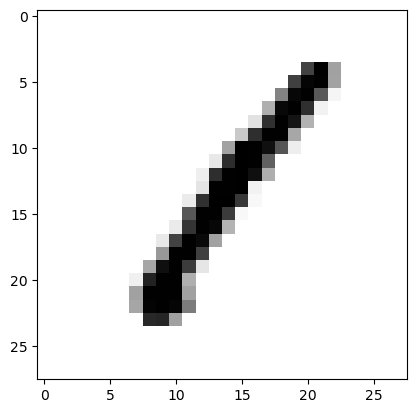

In [8]:
# Vamos a imprimir un digito
i = 0
print("El número es:", digits.loc[i, 'label']) 
import matplotlib.pyplot as plt
plt.imshow(digits.loc[i, cols].values.reshape((28, 28)).astype(float), cmap=plt.cm.gray_r, interpolation='nearest')


## Train/Test
<p>Una de las principales diferencias entre la Estadística Clasica y el <i>Machine Learning</i> es la división del conjunto de datos en conjuntos de entrenamiento y prueba, con el objetivo de medir y cuantificar la precisión y el nivel de error en los datos que de alguna manera el modelo <i>"No ha visto"</i>. A continuación crearemos nuestros conjuntos de entrenamiento y prueba con el método <code>train_test_split</code> y mediremos cual es el nivel de precisión de nuestro modelo. El objetivo es <b>predecir cual es el digito dada una imagen</b>!!!. Para lo cual entrenaremos un clasificador <i>k-NN</i> a los datos de entrenamiento y luego calcularemos su precisión usando el método <code>accuracy_score()</code> en los datos de prueba ¿Como crees que en un modelo de Clasificación se calcule su precisión?. Parece bastante dificil, pero no lo es ;)</p>

In [11]:
# Importa la librería para entrenamiento y prueba de datos y la librería para calcular la precisión
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Crea los arreglos para las variables independientes y la variable objetivo
X = digits.drop('label', axis=1).values 
y = digits['label'].values 


# Divide los arreglos anteriores en conjuntos de training y test en una proporcion del 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instancia un clasificador k-NN con 14 vecinos
knn = KNeighborsClassifier(n_neighbors=14)

# Ajusta (Entrenamiento) el clasificador en el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Calcular las predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Verificar la precisión del modelo 
print(accuracy_score(y_test, y_pred))


0.9567460317460318


## Reconocimiento de tu imagen
<p>Con todo lo anterior, podemos hacer el reconocimiento de cualquier digito que dibujes, ¿Estás list@?</p>

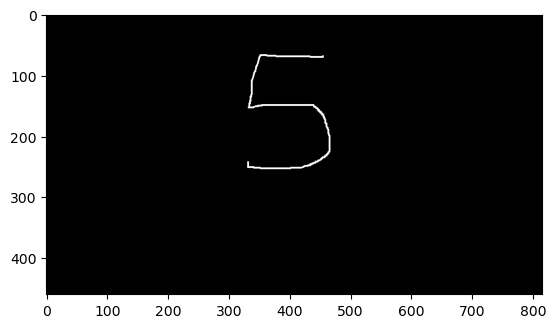

In [20]:
# Vamos a visualizar la imagen de un número que vas a crear en tu computador con la aplicación de paint, ésta imagen debe de tener un fondo negro y ser pintada en blanco, encontrarás un ejemplo en el repositorio
image = plt.imread('numero.jpg') 
plt.imshow(image)


In [22]:
# Con esta libreria transformaremos la imagen creada a un formato de 28x28 pixeles
from PIL import Image

pil = Image.open('numero.jpg')
image_resize = pil.resize((28, 28))

# Vamos transformar la nueva imagen en un array donde se almacenara la información de los pixeles
pixels = np.asarray(image_resize)

In [24]:
# Necesitamos hacer algunas configuraciones a la imagen debido al formato de datos que esta alimentando al modelo y a la configuración de sklearn
arr = pixels.transpose(2, 0, 1).reshape(-1, pixels.shape[1])[0:28]
image_final = arr.ravel().reshape(1, -1)


El número es: 1


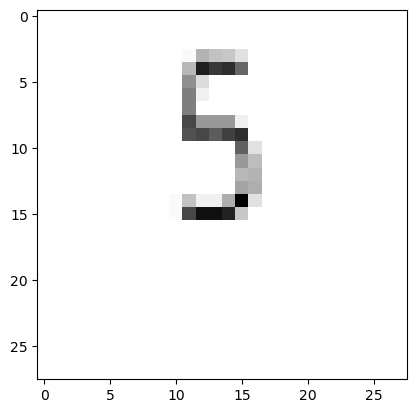

In [26]:
# Calcula la predicción del modelo con el número que creaste, ¿Fue la clasificación correcta? :O
prediction = knn.predict(image_final)
print("El número es:", prediction[0])

plt.imshow(arr, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Overfit and Underfit
<p>¿Cual es mi numero ideal para elegir el parametro <i>k</i>? Vamos a calcular los valores de precisión para los conjuntos e entrenamiento y prueba para una rango de valores k. Al observar cómo difieren estos valores podremos observar cual es el mejor parametro sin caer en un <i>Overfit</i> o un <i>Underfit</i>.</p>

In [29]:
# Configuración de arreglos iniciales
neighbors = np.arange(1, 9)  # Valores de k que se probarán (de 1 a 8)
train_accuracy = np.empty(len(neighbors))  # Almacenará la precisión del conjunto de entrenamiento
test_accuracy = np.empty(len(neighbors))  # Almacenará la precisión del conjunto de prueba

In [31]:
# Loop para diferentes valores de k
for i, k in enumerate(neighbors):
    # Clasificador k-NN para el parámetro k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Ajuste del clasificador al dataset de entrenamiento
    knn.fit(X_train, y_train)
    
    # Cálculo de precisión sobre el dataset de entrenamiento
    train_accuracy[i] = knn.score(X_train, y_train)

    # Cálculo de precisión sobre el dataset de prueba
    test_accuracy[i] = knn.score(X_test, y_test)



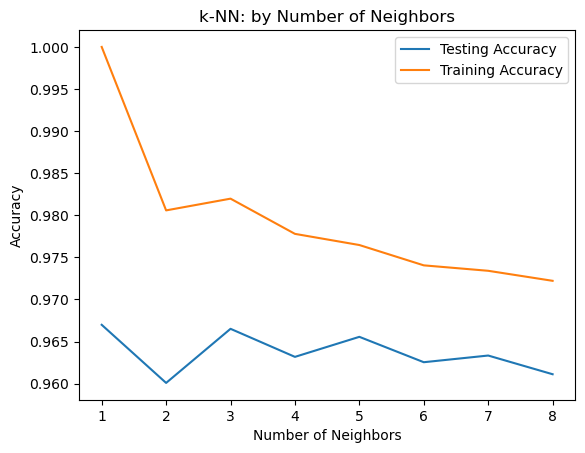

In [33]:
# Gráfico para encontrar un valor óptimo de k
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.title('k-NN: by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Regresión Logística
<p>Haz la predicción de tu imagen, pero esta vez por medio de una Regresión Logística, ¿Cuál de los dos modelos te da mejores resultados?</p>

In [38]:
#Para la regresión lógistica entrenaremos el Modelo de Regresión Logística, lo evaluaremos, procesaremos la imagen y realizaremos la predicción
# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Crea los arreglos para las variables independientes y la variable objetivo
X = digits.drop('label', axis=1).values 
y = digits['label'].values 

# Dividir los datos en conjuntos de entrenamiento y prueba ahora será del 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
model = LogisticRegression(solver="newton-cg")
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Intercepto (Beta0): ", clf. intercept_)
print("Pesos (Betas): ", clf.coef_)
print("-----------------------------------------------------------")
score = model.score(X_test, y_test)
print("Precisión global: ", score)
print("-----------------------------------------------------------")
print(classification_report(y_test, y_pred))

Intercepto (Beta0):  [-0.27018782  0.10363293  0.15656886 -0.47387381  0.07601007  1.74881683
 -0.13432467  0.44359358 -1.39747629 -0.25275969]
Pesos (Betas):  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-----------------------------------------------------------
Precisión global:  0.8995238095238095
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       816
           1       0.94      0.96      0.95       909
           2       0.87      0.85      0.86       846
           3       0.90      0.86      0.88       937
           4       0.90      0.90      0.90       839
           5       0.84      0.85      0.85       702
           6       0.90      0.94      0.92       785
           7       0.93      0.92      0.92       893
           8       0.88      0.87      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


El número es: 5


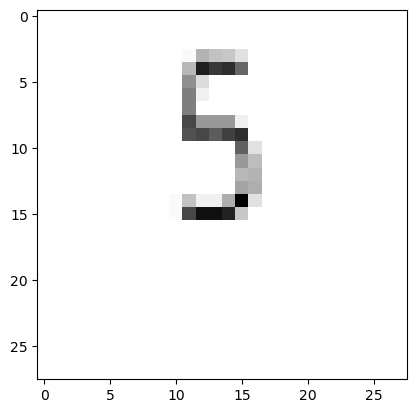

In [42]:
#Trabajamos sobre nuestra imagemn
image = plt.imread('numero.jpg') 
pil = Image.open('numero.jpg')
image_resize = pil.resize((28, 28))

# Vamos transformar la nueva imagen en un array donde se almacenara la información de los pixeles
pixels = np.asarray(image_resize)
# Calcula la predicción del modelo con el número que creaste, ¿Fue la clasificación correcta? :O
prediction = clf.predict(image_final)
print("El número es:", prediction[0])
plt.imshow(arr, cmap=plt.cm.gray_r, interpolation='nearest')
